В данном примере мы рассмотрим аналитически заданную функцию. Зададим величины ошибки случайным образом и найдем первую и вторую производную.

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

import regularization as reg

Зададим аналитически функцию и ее теоретические производные:

In [2]:
x = np.arange(30) 
y = 4*x*3 + 5*x**2 + 6*x + 7
y_1 = 12*x**2 + 10*x + 6
y_2 = 24*x + 10

Зададим размеры ошибок:

In [3]:
per = 0.01

err = []
for i in range(len(y)):
    if i == 0:
        err.append(per*max(y))
    else:
        err.append(err[i-1]+per*max(y)/len(x))

Выберем случайное число из промежутка [y-err; y+err], это и будут наши сгенерированные данные.

In [5]:
data = []
for i in range(len(y)):
    data.append(randint(int(y[i]-err[i]), int(y[i]+err[i])))

height = data
t_height = x
err_height = err

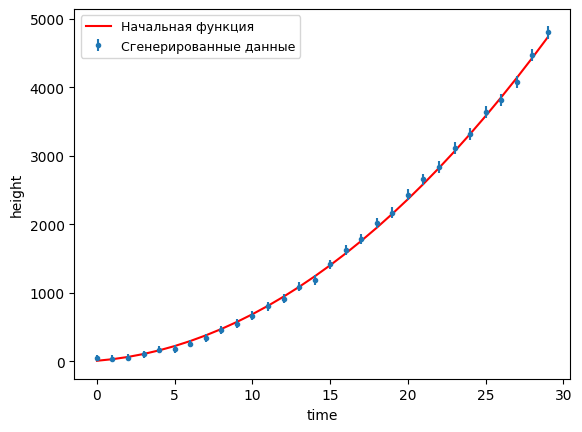

In [7]:
plt.plot(t_height, y, label='Начальная функция', c='r')
plt.errorbar(t_height,height, yerr=err_height, fmt='.', label='Сгенерированные данные')

plt.xlabel('time')
plt.ylabel('height')
plt.legend(loc = 'best', prop={'size':9})
# plt.title('Парабола и сгенерированные точки с линейным ростом ошибки')

In [28]:
t_vel, vel, height_back = reg.regularization(height, t_height, err_height, alpha=1e1, ord=2, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.1143414902180806
reduced chi2 for integrated regularization results =  0.10189989476453594


In [29]:
t_vel, vel_mk, err_vel = reg.regularization(height, t_height, err_height, alpha=1e1, ord=2, print_parameters=False, mk=True)

100%|██████████| 100/100 [00:11<00:00,  8.92it/s]


Text(0.5, 0, 'time')

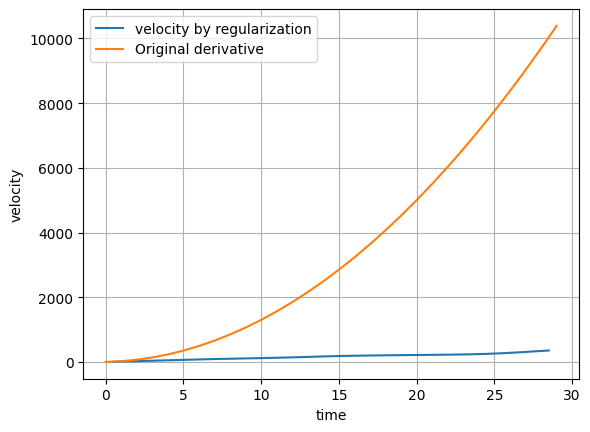

In [30]:
fig, ax = plt.subplots()
ax.plot(t_vel,vel, label = 'velocity by regularization')
# ax.errorbar(t_vel,vel_mk,err_vel,fmt='.', label = 'velocity with errors by Monte-Karlo')
ax.plot(x,y_1, label='Original derivative')
ax.legend()
ax.grid()
ax.set_ylabel('velocity')
ax.set_xlabel('time')